# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

<AxesSubplot:xlabel='Ethnicity'>

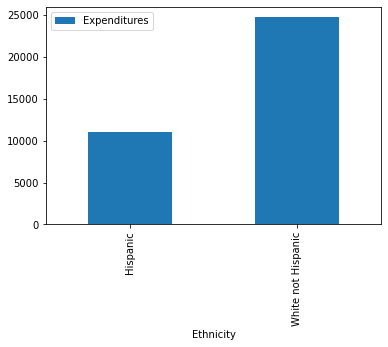

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('ca_dds_expenditures.csv')
# pivot table using ethnicity and filtering for only Hispanics and whites
comp = pd.pivot_table(df, values=['Expenditures'], index=['Ethnicity'], aggfunc=np.mean).loc[['Hispanic', 'White not Hispanic'],:]
comp.plot.bar()

Based on the graph above, we see a disparity between the average expenditures between Hispanics and whites (non-Hispanics).

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

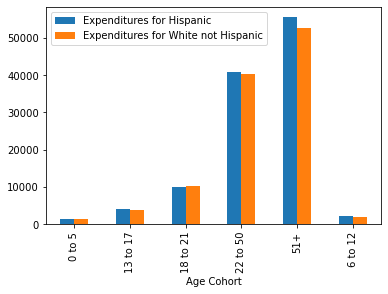

In [2]:
# pivot table using ethnicity and filtering for only Hispanics and whites within each age cohort
comp = pd.pivot_table(df, values=['Expenditures'], index=['Ethnicity', 'Age Cohort'], aggfunc=np.mean).loc[['Hispanic', 'White not Hispanic'],:]
comp.unstack(0).plot.bar().legend(['Expenditures for Hispanic', 'Expenditures for White not Hispanic']) # graph side by side

Based on the graph above, it appears that the average expenditures between Hispanics and whites (non-Hispanics) within each age cohort has no visible disparity. These results appear to contradict the ones obtained in Question 1 as it shows no disparity for average expenditures between Hispanics and whites, unlike Question 1.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

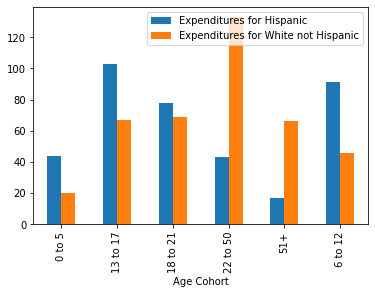

In [3]:
# count distribution of ages of Hispanics and whites
comp = pd.pivot_table(df, values=['Expenditures'], index=['Ethnicity', 'Age Cohort'], aggfunc='count').loc[['Hispanic', 'White not Hispanic'],:]
comp.unstack(0).plot.bar().legend(['Expenditures for Hispanic', 'Expenditures for White not Hispanic']) # graph side by side

Graphing the distributions of ages of Hispanics and whites (as seen above), we can observe that there is a more even distribution of ages for whites compared to Hispanics. It is also important to note that there's a greater distribution of older ages (i.e. above 22) for whites compared to Hispanics; on the other hand, there's a greater distribution of younger ages (i.e. below 22).

These distributions of ages may then be the reason as to why whites appear to have a greater expenditure compared to Hispanics in Question 1, since a larger distribution of older ages may contribute to a larger expenditure for whites while a larger distribution of younger ages may contribute to a smaller expenditure for Hispanics.

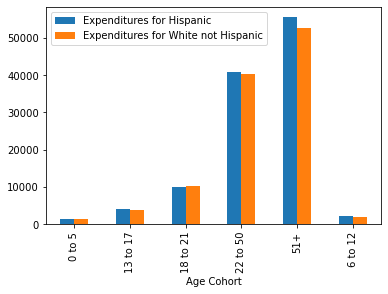

In [4]:
# primarily group by age cohort to get average expenditure as a function of age
comp = pd.pivot_table(df, values=['Expenditures'], index=['Age Cohort', 'Ethnicity'], aggfunc=np.mean).loc[(slice(None), ['Hispanic', 'White not Hispanic']),:]
comp.unstack(1).plot.bar().legend(['Expenditures for Hispanic', 'Expenditures for White not Hispanic']) # graph side by side

Graphing the average expenditure as a function of age, we see that the average expenditure is the highest for ages 22 to 50 and 51+. With this information and the information from the previous graph, we can see more clearly as to why whites appear to have a greater expenditure compared to Hispanics. 

From the previous graph, we see that whites have a larger distribution of ages in the 22 to 50 and 51+ ranges compared to Hispanics. And in this graph above, since the average expenditure is the highest for ages 22 to 50 and 51+, the resulting expenditure for whites would naturally be larger than the one for Hispanics.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope.
4. Demo your lab.